In [1]:
#Function Transformation ( non-normal distrubtion to normal distrubtion )


import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
n=pd.read_csv("hpl.csv")
n.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN


In [2]:
n.shape

(577, 18)

In [3]:
n.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets,umpire3
count,577.000000,577.000000,577.000000,577.000000,577.000000,0.0
mean,289.000000,2012.029463,0.025997,13.715771,3.363951,NaN
std,166.709828,2.486247,0.159263,23.619282,3.416049,NaN
min,1.000000,2008.000000,0.000000,0.000000,0.000000,NaN
25%,145.000000,2010.000000,0.000000,0.000000,0.000000,NaN
50%,289.000000,2012.000000,0.000000,0.000000,3.000000,NaN
75%,433.000000,2014.000000,0.000000,20.000000,6.000000,NaN
max,577.000000,2016.000000,1.000000,144.000000,10.000000,NaN


C:\Users\tonyf\AppData\Local\Temp\ipykernel_13016\4054580758.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(n["win_by_wickets"])


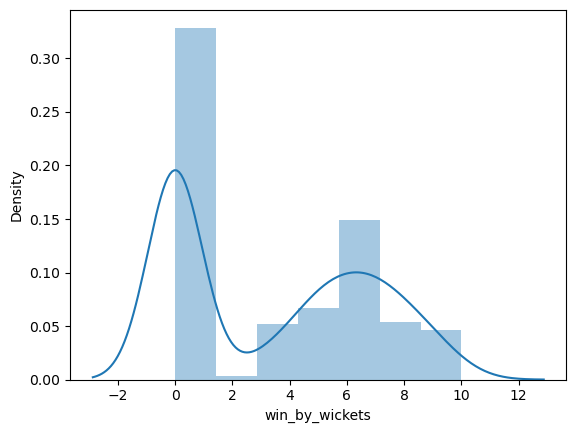

In [4]:
#checking wether outliers are present

sns.distplot(n["win_by_wickets"])
plt.show()

In [5]:
#Removing the outliers using IQR method

q1=n["win_by_wickets"].quantile(0.25)
q3=n["win_by_wickets"].quantile(0.75)
q1,q3

(0.0, 6.0)

In [6]:
IQR=q3-q1

In [7]:
min_range=q1-(1.5*IQR)
max_range=q3+(1.5*IQR)
min_range,max_range

(-9.0, 15.0)

In [8]:
n=n[n["win_by_wickets"]<=max_range]

C:\Users\tonyf\AppData\Local\Temp\ipykernel_13016\2727993695.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(n["win_by_wickets"])


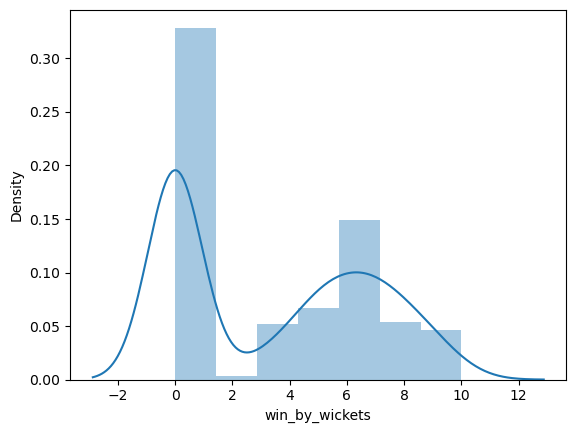

In [9]:
#after outliers

sns.distplot(n["win_by_wickets"])
plt.show()

In [10]:
#other than log1p it result the value as infinity and error 
# function transformation 
# also we can give our own funnction for the transformation

from sklearn.preprocessing import FunctionTransformer
ft=FunctionTransformer(func=np.log1p)
n["FT_win_by_wickets"]=ft.fit_transform(n[["win_by_wickets"]])

In [11]:
n.head(3)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,FT_win_by_wickets
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN,0.000000
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN,0.000000
2,3,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN,2.302585


C:\Users\tonyf\AppData\Local\Temp\ipykernel_13016\2634521502.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(n["win_by_wickets"])
C:\Users\tonyf\AppData\Local\Temp\ipykernel_13016\2634521502.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(n["FT_win_by_wickets"])


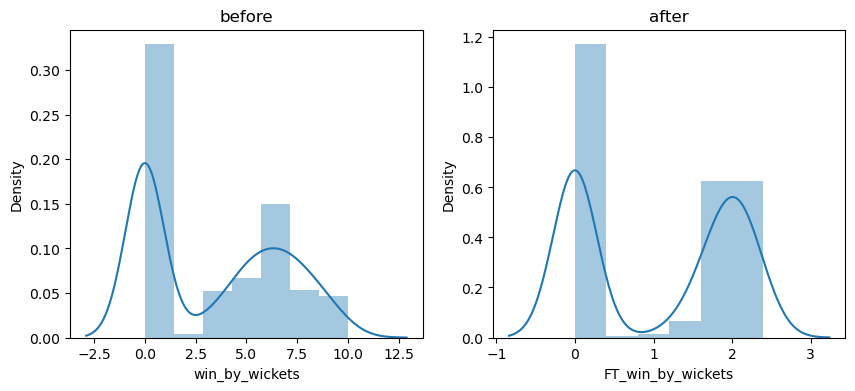

In [12]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.title("before")
sns.distplot(n["win_by_wickets"])

plt.subplot(1,2,2)
plt.title("after")
sns.distplot(n["FT_win_by_wickets"])
plt.show()